In [1]:
from typing import List, Sequence, Tuple

class MyConvexHull:

	# Menerima seluruh data berupa posisi dari titik-titik
	def __init__(self, points):
		# Mengubah bentuk data ke generator of tuple 
		# sehingga dapat diolah
		param = ((i[0], i[1]) for i in points)
		res = self.make_hull(sorted(param))
		self.x_coords = [i[0] for i in res]
		self.x_coords.append(res[0][0])
		self.y_coords = [i[1] for i in res]
		self.y_coords.append(res[0][1])

	# Membuat Convex Hull
	def make_hull(self, points):
		# Menangani edgecase
		if len(points) <= 1:
			return list(points)

		# Membuat array untuk menampung hasil dari
		# pembagian area akibat algoritma divide and conquer	
		area_one = []
		area_two = []

		# Melakukan conquer sesuai dengan
		# pengertian dari convex hull
		for area in (area_one, area_two):
			if (area != area_one):
				points = reversed(points)

			for p in points:
				while len(area) >= 2:
					x_one, y_one = area[-1]
					x_two, y_two = area[-2]
					check1 = (x_one - x_two) * (p[1] - y_two)
					check2 = (y_one - y_two) * (p[0] - x_two)
					if (check1 >= check2):
						area.pop()
					else:
						break
				area.append(p)

			area.pop()
	
		if (len(area_one) == 1):
			if (area_one == area_two):
				area_two = []
		
		# Menggabungkan hasil dari kedua buah area
		area_one += area_two

		# Mengembalikan hasil
		return area_one

List dataset yang tersedia:
1. Iris
2. Wine
3. Breast Cancer
Input dataset yang diinginkan: 1


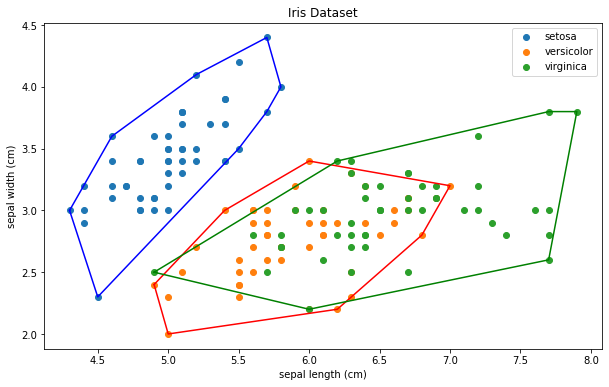

In [2]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
from sklearn import datasets

from myconvexhull import MyConvexHull

# Untuk checking hasil 
# from scipy.spatial import ConvexHull

if __name__ == "__main__":
	print("List dataset yang tersedia:")
	print("1. Iris")
	print("2. Wine")
	print("3. Breast Cancer")
	option = int(input("Input dataset yang diinginkan: "))

	if (option==1):
		data = datasets.load_iris()
		title = "Iris Dataset"
	elif (option==2):
		data = datasets.load_wine()
		title = "Wine Dataset"
	elif (option==3):
		data = datasets.load_breast_cancer()
		title = "Breast Cancer Dataset"
	else:
		print("Dataset tidak tersedia")
		exit()

	#create a DataFrame 
	df = pd.DataFrame(data.data, columns=data.feature_names) 
	df['Target'] = pd.DataFrame(data.target) 
	# print(df)
	df.head()
	plt.figure(figsize = (10, 6))
	colors = ['b','r','g', 'c', 'm', 'y', 'k', 'w', 'aquamarine', 'mediumseagreen']
	plt.title(title)
	plt.xlabel(data.feature_names[0])
	plt.ylabel(data.feature_names[1])
	for i in range(len(data.target_names)):
		bucket = df[df['Target'] == i]
		bucket = bucket.iloc[:,[0,1]].values
		# hull = ConvexHull(bucket)
		# print(bucket)
		hull = MyConvexHull(bucket)
		plt.plot(hull.x_coords, hull.y_coords, colors[i])
		plt.scatter(bucket[:, 0], bucket[:, 1], label=data.target_names[i])
		# plt.plot(hull[0], hull[1], colors[i])
		# print(hull.simplices)
		# for simplex in hull.simplices:
		# 	print(simplex)
		# 	plt.plot(bucket[simplex, 0], bucket[simplex, 1], colors[i])
	plt.legend()
	plt.show()